In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, StratifiedKFold
# хотел потестить каждую, хотя classification_report, исчерпвающая для данного случая
from sklearn.metrics import f1_score, classification_report, accuracy_score, average_precision_score, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score, recall_score,confusion_matrix,roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier




In [84]:
data_frame = pd.read_csv('D:\\HR_comma_sep.csv')
data_frame.rename(columns={'sales' : 'department'}, inplace=True)
data_frame.info()
data_frame['department'].value_counts(normalize=True)
data_frame.rename(columns={'Work_accident' : 'work_accident'}, inplace=True)
data_frame['work_accident'].value_counts(normalize=True)
data_frame.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
# tree's hyper params config
MAX_DEPTH = 'max_depth'
BOTTOM_MAX_DEPTH_VALUE = 2
TOP_MAX_DEPTH_VALUE = 12

MAX_FEATURES = 'max_features'
BOTTOM_MAX_FEATURES_VALUE = 3
TOP_MAX_FEATURES_VALUE = 7

MIN_SAMPLES_LEAF = 'min_samples_leaf'
BOTTOM_MIN_SAMPLES_LEAF_VALUE = 1 
TOP_MIN_SAMPLES_LEAF_VALUE = 20

MIN_SAMPLES_SPLIT = 'min_samples_split'
BOTTOM_MIN_SAMPLES_SPLIT_VALUE = 2 
TOP_MIN_SAMPLES_SPLIT_VALUE = 40

CROSS_VALIDATION_COUNT = 5
# задействуем все доступные потоки для ускорения вычислений, для этого нужно передать -1
JOBS_NUMBER = -1
# передадим фиксированное число для воспроизводимости результатов. 
RANDOM_STATE = 42
# среднее гаромническое межлу полнотой и точностью
GRID_SEARCH_CV_SCORING = 'f1'


KNN_HYPER_PARAM_NEIGHBORS_COUNT = 'knn__n_neighbors'
TOP_NEIGHBORS_COUNT_VALUE = 15

In [10]:
def get_trained_decision_tree_classifier_search_cv(x_train, y_train):
    tree_params = {
        MAX_DEPTH : range(BOTTOM_MAX_DEPTH_VALUE, TOP_MAX_DEPTH_VALUE),
        MAX_FEATURES : range(BOTTOM_MAX_FEATURES_VALUE, TOP_MAX_FEATURES_VALUE)
    }

    tree_grid=GridSearchCV(
        estimator=DecisionTreeClassifier(), 
        param_grid=tree_params,
        cv=CROSS_VALIDATION_COUNT, 
        n_jobs=JOBS_NUMBER,
        scoring=GRID_SEARCH_CV_SCORING,
        verbose=True)

    tree_grid.fit(x_train, y_train)
    return tree_grid


In [85]:
data_frame['salary'] = data_frame['salary'].map({"low": 0, "medium": 1, "high": 2})
y = data_frame['left']
data_frame_dummies = pd.get_dummies(data_frame, columns=data_frame.columns[data_frame.dtypes == 'object']).drop('left', axis=1)
# data_frame_dummies.drop(['satisfaction_level', 'number_project', 'time_spend_company'], axis=1,inplace=True)


In [11]:
data_frame['salary'] = data_frame['salary'].map({"low": 0, "medium": 1, "high": 2})
y = data_frame['left']
data_frame.drop(['department', 'left'], axis=1,inplace=True)
data_frame.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,0,0
1,0.80,0.86,5,262,6,0,0,1
2,0.11,0.88,7,272,4,0,0,1
3,0.72,0.87,5,223,5,0,0,0
4,0.37,0.52,2,159,3,0,0,0


In [6]:
data_frame_dummies.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [86]:
x_train, x_holdout, y_train, y_holdout = train_test_split(data_frame_dummies.values, y, test_size=0.3)
data_frame_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 18 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
work_accident             14999 non-null int64
promotion_last_5years     14999 non-null int64
salary                    14999 non-null int64
department_IT             14999 non-null uint8
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
dtypes: float64(2), int64(6), uint8(10)
m

In [12]:
x_train, x_holdout, y_train, y_holdout = train_test_split(data_frame.values, y, test_size=0.3)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 8 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
work_accident            14999 non-null int64
promotion_last_5years    14999 non-null int64
salary                   14999 non-null int64
dtypes: float64(2), int64(6)
memory usage: 937.5 KB


In [19]:
def print_roc_curve(y_pred_proba, 
                    y_true,
                    xlabel='',
                    ylabel='',
                    title=''):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba, pos_label=1)
    plt.plot(fpr, tpr, lw=2, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

In [13]:
def print_confusion_matrix(y_pred, 
                           y_true,
                           xlabel='',
                           ylabel='',
                           title=''):
    matrix = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=[1,0])
    sns.heatmap(matrix, 
                annot=True, 
                cmap=plt.cm.Blues, 
                fmt='.2f', 
                linewidths=0.5, 
                linecolor='orange',
                xticklabels=['Left', 'Non-Left'], 
                yticklabels=['Left', 'Non-Left'])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [14]:
grid_search_cv = get_trained_decision_tree_classifier_search_cv(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    6.4s finished


In [29]:
# predicted = grid_search_cv.predict(x_holdout)
# for i in range(0, len(predited)):
#     if (predicted[i] == 1):
#         print(x_holdout[i])
# # grid_search_cv.predict_proba(x_holdout)

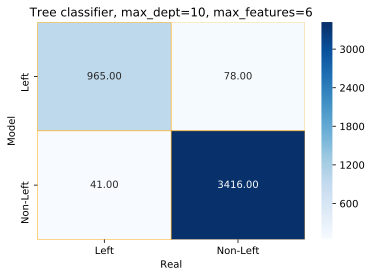

In [34]:
print_confusion_matrix(grid_search_cv.predict(x_holdout),y_holdout,
                       xlabel='Real',
                       ylabel='Model',
                       title='Tree classifier, max_dept=10, max_features=6')

In [28]:
from sklearn.metrics import f1_score, classification_report, accuracy_score, average_precision_score, precision_recall_curve, roc_auc_score, roc_curve,f1_score,precision_score, recall_score,confusion_matrix,roc_auc_score, roc_curve
# report = classification_report(y_holdout, grid_search_cv.predict(x_holdout), target_names=['Non-Left','Left'])
# grid_search_cv.score
# report.shape
# accuracy_score(y_holdout, grid_search_cv.predict(x_holdout));


warn


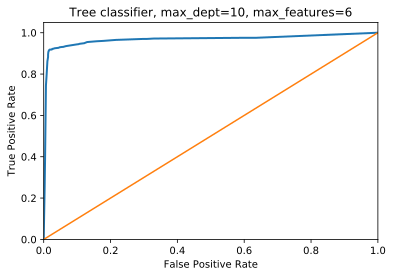

In [14]:
print_roc_curve(
    grid_search_cv.predict_proba(x_holdout)[:,1], 
    y_holdout, 
    'False Positive Rate', 
    'True Positive Rate', 
    'Tree classifier, max_dept=10, max_features=6')

In [32]:
from sklearn.tree import export_graphviz
tree = DecisionTreeClassifier(max_depth=9, criterion='entropy')
tree.fit(x_train, y_train)
export_graphviz(tree, feature_names=data_frame_dummies.columns, 
out_file='D:\\hrmlp_tree.dot', filled=True)
#!dot -Tpng 'D:\\hrmlp_tree.dot' -o 'D:\\hrmlp_tree.png'


In [76]:
data:image/svg+xml,<?xml version="1.0" encoding="utf-8" standalone="no"?>%0D%0A<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN"%0D%0A  "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">%0D%0A<!-- Created with matplotlib (http://matplotlib.org/) -->%0D%0A<svg height="277.314375pt" version="1.1" viewBox="0 0 393.732813 277.314375" width="393.732813pt" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink">%0D%0A <defs>%0D%0A  <style type="text/css">%0D%0A*{stroke-linecap:butt;stroke-linejoin:round;}%0D%0A  </style>%0D%0A </defs>%0D%0A <g id="figure_1">%0D%0A  <g id="patch_1">%0D%0A   <path d="M 0 277.314375 %0D%0AL 393.732813 277.314375 %0D%0AL 393.732813 0 %0D%0AL 0 0 %0D%0Az%0D%0A" style="fill:none;"/>%0D%0A  </g>%0D%0A  <g id="axes_1">%0D%0A   <g id="patch_2">%0D%0A    <path d="M 43.78125 239.758125 %0D%0AL 378.58125 239.758125 %0D%0AL 378.58125 22.318125 %0D%0AL 43.78125 22.318125 %0D%0Az%0D%0A" style="fill:#ffffff;"/>%0D%0A   </g>%0D%0A   <g id="matplotlib.axis_1">%0D%0A    <g id="xtick_1">%0D%0A     <g id="line2d_1">%0D%0A      <defs>%0D%0A       <path d="M 0 0 %0D%0AL 0 3.5 %0D%0A" id="mdaf21d74bc" style="stroke:#000000;stroke-width:0.8;"/>%0D%0A      </defs>%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#mdaf21d74bc" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_1">%0D%0A      <!-- 0.0 -->%0D%0A      <defs>%0D%0A       <path d="M 31.78125 66.40625 %0D%0AQ 24.171875 66.40625 20.328125 58.90625 %0D%0AQ 16.5 51.421875 16.5 36.375 %0D%0AQ 16.5 21.390625 20.328125 13.890625 %0D%0AQ 24.171875 6.390625 31.78125 6.390625 %0D%0AQ 39.453125 6.390625 43.28125 13.890625 %0D%0AQ 47.125 21.390625 47.125 36.375 %0D%0AQ 47.125 51.421875 43.28125 58.90625 %0D%0AQ 39.453125 66.40625 31.78125 66.40625 %0D%0Az%0D%0AM 31.78125 74.21875 %0D%0AQ 44.046875 74.21875 50.515625 64.515625 %0D%0AQ 56.984375 54.828125 56.984375 36.375 %0D%0AQ 56.984375 17.96875 50.515625 8.265625 %0D%0AQ 44.046875 -1.421875 31.78125 -1.421875 %0D%0AQ 19.53125 -1.421875 13.0625 8.265625 %0D%0AQ 6.59375 17.96875 6.59375 36.375 %0D%0AQ 6.59375 54.828125 13.0625 64.515625 %0D%0AQ 19.53125 74.21875 31.78125 74.21875 %0D%0Az%0D%0A" id="DejaVuSans-30"/>%0D%0A       <path d="M 10.6875 12.40625 %0D%0AL 21 12.40625 %0D%0AL 21 0 %0D%0AL 10.6875 0 %0D%0Az%0D%0A" id="DejaVuSans-2e"/>%0D%0A      </defs>%0D%0A      <g transform="translate(35.829688 254.356562)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-30"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="xtick_2">%0D%0A     <g id="line2d_2">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="110.74125" xlink:href="#mdaf21d74bc" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_2">%0D%0A      <!-- 0.2 -->%0D%0A      <defs>%0D%0A       <path d="M 19.1875 8.296875 %0D%0AL 53.609375 8.296875 %0D%0AL 53.609375 0 %0D%0AL 7.328125 0 %0D%0AL 7.328125 8.296875 %0D%0AQ 12.9375 14.109375 22.625 23.890625 %0D%0AQ 32.328125 33.6875 34.8125 36.53125 %0D%0AQ 39.546875 41.84375 41.421875 45.53125 %0D%0AQ 43.3125 49.21875 43.3125 52.78125 %0D%0AQ 43.3125 58.59375 39.234375 62.25 %0D%0AQ 35.15625 65.921875 28.609375 65.921875 %0D%0AQ 23.96875 65.921875 18.8125 64.3125 %0D%0AQ 13.671875 62.703125 7.8125 59.421875 %0D%0AL 7.8125 69.390625 %0D%0AQ 13.765625 71.78125 18.9375 73 %0D%0AQ 24.125 74.21875 28.421875 74.21875 %0D%0AQ 39.75 74.21875 46.484375 68.546875 %0D%0AQ 53.21875 62.890625 53.21875 53.421875 %0D%0AQ 53.21875 48.921875 51.53125 44.890625 %0D%0AQ 49.859375 40.875 45.40625 35.40625 %0D%0AQ 44.1875 33.984375 37.640625 27.21875 %0D%0AQ 31.109375 20.453125 19.1875 8.296875 %0D%0Az%0D%0A" id="DejaVuSans-32"/>%0D%0A      </defs>%0D%0A      <g transform="translate(102.789688 254.356562)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-32"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="xtick_3">%0D%0A     <g id="line2d_3">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="177.70125" xlink:href="#mdaf21d74bc" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_3">%0D%0A      <!-- 0.4 -->%0D%0A      <defs>%0D%0A       <path d="M 37.796875 64.3125 %0D%0AL 12.890625 25.390625 %0D%0AL 37.796875 25.390625 %0D%0Az%0D%0AM 35.203125 72.90625 %0D%0AL 47.609375 72.90625 %0D%0AL 47.609375 25.390625 %0D%0AL 58.015625 25.390625 %0D%0AL 58.015625 17.1875 %0D%0AL 47.609375 17.1875 %0D%0AL 47.609375 0 %0D%0AL 37.796875 0 %0D%0AL 37.796875 17.1875 %0D%0AL 4.890625 17.1875 %0D%0AL 4.890625 26.703125 %0D%0Az%0D%0A" id="DejaVuSans-34"/>%0D%0A      </defs>%0D%0A      <g transform="translate(169.749688 254.356562)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-34"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="xtick_4">%0D%0A     <g id="line2d_4">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="244.66125" xlink:href="#mdaf21d74bc" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_4">%0D%0A      <!-- 0.6 -->%0D%0A      <defs>%0D%0A       <path d="M 33.015625 40.375 %0D%0AQ 26.375 40.375 22.484375 35.828125 %0D%0AQ 18.609375 31.296875 18.609375 23.390625 %0D%0AQ 18.609375 15.53125 22.484375 10.953125 %0D%0AQ 26.375 6.390625 33.015625 6.390625 %0D%0AQ 39.65625 6.390625 43.53125 10.953125 %0D%0AQ 47.40625 15.53125 47.40625 23.390625 %0D%0AQ 47.40625 31.296875 43.53125 35.828125 %0D%0AQ 39.65625 40.375 33.015625 40.375 %0D%0Az%0D%0AM 52.59375 71.296875 %0D%0AL 52.59375 62.3125 %0D%0AQ 48.875 64.0625 45.09375 64.984375 %0D%0AQ 41.3125 65.921875 37.59375 65.921875 %0D%0AQ 27.828125 65.921875 22.671875 59.328125 %0D%0AQ 17.53125 52.734375 16.796875 39.40625 %0D%0AQ 19.671875 43.65625 24.015625 45.921875 %0D%0AQ 28.375 48.1875 33.59375 48.1875 %0D%0AQ 44.578125 48.1875 50.953125 41.515625 %0D%0AQ 57.328125 34.859375 57.328125 23.390625 %0D%0AQ 57.328125 12.15625 50.6875 5.359375 %0D%0AQ 44.046875 -1.421875 33.015625 -1.421875 %0D%0AQ 20.359375 -1.421875 13.671875 8.265625 %0D%0AQ 6.984375 17.96875 6.984375 36.375 %0D%0AQ 6.984375 53.65625 15.1875 63.9375 %0D%0AQ 23.390625 74.21875 37.203125 74.21875 %0D%0AQ 40.921875 74.21875 44.703125 73.484375 %0D%0AQ 48.484375 72.75 52.59375 71.296875 %0D%0Az%0D%0A" id="DejaVuSans-36"/>%0D%0A      </defs>%0D%0A      <g transform="translate(236.709688 254.356562)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-36"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="xtick_5">%0D%0A     <g id="line2d_5">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="311.62125" xlink:href="#mdaf21d74bc" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_5">%0D%0A      <!-- 0.8 -->%0D%0A      <defs>%0D%0A       <path d="M 31.78125 34.625 %0D%0AQ 24.75 34.625 20.71875 30.859375 %0D%0AQ 16.703125 27.09375 16.703125 20.515625 %0D%0AQ 16.703125 13.921875 20.71875 10.15625 %0D%0AQ 24.75 6.390625 31.78125 6.390625 %0D%0AQ 38.8125 6.390625 42.859375 10.171875 %0D%0AQ 46.921875 13.96875 46.921875 20.515625 %0D%0AQ 46.921875 27.09375 42.890625 30.859375 %0D%0AQ 38.875 34.625 31.78125 34.625 %0D%0Az%0D%0AM 21.921875 38.8125 %0D%0AQ 15.578125 40.375 12.03125 44.71875 %0D%0AQ 8.5 49.078125 8.5 55.328125 %0D%0AQ 8.5 64.0625 14.71875 69.140625 %0D%0AQ 20.953125 74.21875 31.78125 74.21875 %0D%0AQ 42.671875 74.21875 48.875 69.140625 %0D%0AQ 55.078125 64.0625 55.078125 55.328125 %0D%0AQ 55.078125 49.078125 51.53125 44.71875 %0D%0AQ 48 40.375 41.703125 38.8125 %0D%0AQ 48.828125 37.15625 52.796875 32.3125 %0D%0AQ 56.78125 27.484375 56.78125 20.515625 %0D%0AQ 56.78125 9.90625 50.3125 4.234375 %0D%0AQ 43.84375 -1.421875 31.78125 -1.421875 %0D%0AQ 19.734375 -1.421875 13.25 4.234375 %0D%0AQ 6.78125 9.90625 6.78125 20.515625 %0D%0AQ 6.78125 27.484375 10.78125 32.3125 %0D%0AQ 14.796875 37.15625 21.921875 38.8125 %0D%0Az%0D%0AM 18.3125 54.390625 %0D%0AQ 18.3125 48.734375 21.84375 45.5625 %0D%0AQ 25.390625 42.390625 31.78125 42.390625 %0D%0AQ 38.140625 42.390625 41.71875 45.5625 %0D%0AQ 45.3125 48.734375 45.3125 54.390625 %0D%0AQ 45.3125 60.0625 41.71875 63.234375 %0D%0AQ 38.140625 66.40625 31.78125 66.40625 %0D%0AQ 25.390625 66.40625 21.84375 63.234375 %0D%0AQ 18.3125 60.0625 18.3125 54.390625 %0D%0Az%0D%0A" id="DejaVuSans-38"/>%0D%0A      </defs>%0D%0A      <g transform="translate(303.669688 254.356562)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-38"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="xtick_6">%0D%0A     <g id="line2d_6">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="378.58125" xlink:href="#mdaf21d74bc" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_6">%0D%0A      <!-- 1.0 -->%0D%0A      <defs>%0D%0A       <path d="M 12.40625 8.296875 %0D%0AL 28.515625 8.296875 %0D%0AL 28.515625 63.921875 %0D%0AL 10.984375 60.40625 %0D%0AL 10.984375 69.390625 %0D%0AL 28.421875 72.90625 %0D%0AL 38.28125 72.90625 %0D%0AL 38.28125 8.296875 %0D%0AL 54.390625 8.296875 %0D%0AL 54.390625 0 %0D%0AL 12.40625 0 %0D%0Az%0D%0A" id="DejaVuSans-31"/>%0D%0A      </defs>%0D%0A      <g transform="translate(370.629687 254.356562)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-31"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-30"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="text_7">%0D%0A     <!-- False Positive Rate -->%0D%0A     <defs>%0D%0A      <path d="M 9.8125 72.90625 %0D%0AL 51.703125 72.90625 %0D%0AL 51.703125 64.59375 %0D%0AL 19.671875 64.59375 %0D%0AL 19.671875 43.109375 %0D%0AL 48.578125 43.109375 %0D%0AL 48.578125 34.8125 %0D%0AL 19.671875 34.8125 %0D%0AL 19.671875 0 %0D%0AL 9.8125 0 %0D%0Az%0D%0A" id="DejaVuSans-46"/>%0D%0A      <path d="M 34.28125 27.484375 %0D%0AQ 23.390625 27.484375 19.1875 25 %0D%0AQ 14.984375 22.515625 14.984375 16.5 %0D%0AQ 14.984375 11.71875 18.140625 8.90625 %0D%0AQ 21.296875 6.109375 26.703125 6.109375 %0D%0AQ 34.1875 6.109375 38.703125 11.40625 %0D%0AQ 43.21875 16.703125 43.21875 25.484375 %0D%0AL 43.21875 27.484375 %0D%0Az%0D%0AM 52.203125 31.203125 %0D%0AL 52.203125 0 %0D%0AL 43.21875 0 %0D%0AL 43.21875 8.296875 %0D%0AQ 40.140625 3.328125 35.546875 0.953125 %0D%0AQ 30.953125 -1.421875 24.3125 -1.421875 %0D%0AQ 15.921875 -1.421875 10.953125 3.296875 %0D%0AQ 6 8.015625 6 15.921875 %0D%0AQ 6 25.140625 12.171875 29.828125 %0D%0AQ 18.359375 34.515625 30.609375 34.515625 %0D%0AL 43.21875 34.515625 %0D%0AL 43.21875 35.40625 %0D%0AQ 43.21875 41.609375 39.140625 45 %0D%0AQ 35.0625 48.390625 27.6875 48.390625 %0D%0AQ 23 48.390625 18.546875 47.265625 %0D%0AQ 14.109375 46.140625 10.015625 43.890625 %0D%0AL 10.015625 52.203125 %0D%0AQ 14.9375 54.109375 19.578125 55.046875 %0D%0AQ 24.21875 56 28.609375 56 %0D%0AQ 40.484375 56 46.34375 49.84375 %0D%0AQ 52.203125 43.703125 52.203125 31.203125 %0D%0Az%0D%0A" id="DejaVuSans-61"/>%0D%0A      <path d="M 9.421875 75.984375 %0D%0AL 18.40625 75.984375 %0D%0AL 18.40625 0 %0D%0AL 9.421875 0 %0D%0Az%0D%0A" id="DejaVuSans-6c"/>%0D%0A      <path d="M 44.28125 53.078125 %0D%0AL 44.28125 44.578125 %0D%0AQ 40.484375 46.53125 36.375 47.5 %0D%0AQ 32.28125 48.484375 27.875 48.484375 %0D%0AQ 21.1875 48.484375 17.84375 46.4375 %0D%0AQ 14.5 44.390625 14.5 40.28125 %0D%0AQ 14.5 37.15625 16.890625 35.375 %0D%0AQ 19.28125 33.59375 26.515625 31.984375 %0D%0AL 29.59375 31.296875 %0D%0AQ 39.15625 29.25 43.1875 25.515625 %0D%0AQ 47.21875 21.78125 47.21875 15.09375 %0D%0AQ 47.21875 7.46875 41.1875 3.015625 %0D%0AQ 35.15625 -1.421875 24.609375 -1.421875 %0D%0AQ 20.21875 -1.421875 15.453125 -0.5625 %0D%0AQ 10.6875 0.296875 5.421875 2 %0D%0AL 5.421875 11.28125 %0D%0AQ 10.40625 8.6875 15.234375 7.390625 %0D%0AQ 20.0625 6.109375 24.8125 6.109375 %0D%0AQ 31.15625 6.109375 34.5625 8.28125 %0D%0AQ 37.984375 10.453125 37.984375 14.40625 %0D%0AQ 37.984375 18.0625 35.515625 20.015625 %0D%0AQ 33.0625 21.96875 24.703125 23.78125 %0D%0AL 21.578125 24.515625 %0D%0AQ 13.234375 26.265625 9.515625 29.90625 %0D%0AQ 5.8125 33.546875 5.8125 39.890625 %0D%0AQ 5.8125 47.609375 11.28125 51.796875 %0D%0AQ 16.75 56 26.8125 56 %0D%0AQ 31.78125 56 36.171875 55.265625 %0D%0AQ 40.578125 54.546875 44.28125 53.078125 %0D%0Az%0D%0A" id="DejaVuSans-73"/>%0D%0A      <path d="M 56.203125 29.59375 %0D%0AL 56.203125 25.203125 %0D%0AL 14.890625 25.203125 %0D%0AQ 15.484375 15.921875 20.484375 11.0625 %0D%0AQ 25.484375 6.203125 34.421875 6.203125 %0D%0AQ 39.59375 6.203125 44.453125 7.46875 %0D%0AQ 49.3125 8.734375 54.109375 11.28125 %0D%0AL 54.109375 2.78125 %0D%0AQ 49.265625 0.734375 44.1875 -0.34375 %0D%0AQ 39.109375 -1.421875 33.890625 -1.421875 %0D%0AQ 20.796875 -1.421875 13.15625 6.1875 %0D%0AQ 5.515625 13.8125 5.515625 26.8125 %0D%0AQ 5.515625 40.234375 12.765625 48.109375 %0D%0AQ 20.015625 56 32.328125 56 %0D%0AQ 43.359375 56 49.78125 48.890625 %0D%0AQ 56.203125 41.796875 56.203125 29.59375 %0D%0Az%0D%0AM 47.21875 32.234375 %0D%0AQ 47.125 39.59375 43.09375 43.984375 %0D%0AQ 39.0625 48.390625 32.421875 48.390625 %0D%0AQ 24.90625 48.390625 20.390625 44.140625 %0D%0AQ 15.875 39.890625 15.1875 32.171875 %0D%0Az%0D%0A" id="DejaVuSans-65"/>%0D%0A      <path id="DejaVuSans-20"/>%0D%0A      <path d="M 19.671875 64.796875 %0D%0AL 19.671875 37.40625 %0D%0AL 32.078125 37.40625 %0D%0AQ 38.96875 37.40625 42.71875 40.96875 %0D%0AQ 46.484375 44.53125 46.484375 51.125 %0D%0AQ 46.484375 57.671875 42.71875 61.234375 %0D%0AQ 38.96875 64.796875 32.078125 64.796875 %0D%0Az%0D%0AM 9.8125 72.90625 %0D%0AL 32.078125 72.90625 %0D%0AQ 44.34375 72.90625 50.609375 67.359375 %0D%0AQ 56.890625 61.8125 56.890625 51.125 %0D%0AQ 56.890625 40.328125 50.609375 34.8125 %0D%0AQ 44.34375 29.296875 32.078125 29.296875 %0D%0AL 19.671875 29.296875 %0D%0AL 19.671875 0 %0D%0AL 9.8125 0 %0D%0Az%0D%0A" id="DejaVuSans-50"/>%0D%0A      <path d="M 30.609375 48.390625 %0D%0AQ 23.390625 48.390625 19.1875 42.75 %0D%0AQ 14.984375 37.109375 14.984375 27.296875 %0D%0AQ 14.984375 17.484375 19.15625 11.84375 %0D%0AQ 23.34375 6.203125 30.609375 6.203125 %0D%0AQ 37.796875 6.203125 41.984375 11.859375 %0D%0AQ 46.1875 17.53125 46.1875 27.296875 %0D%0AQ 46.1875 37.015625 41.984375 42.703125 %0D%0AQ 37.796875 48.390625 30.609375 48.390625 %0D%0Az%0D%0AM 30.609375 56 %0D%0AQ 42.328125 56 49.015625 48.375 %0D%0AQ 55.71875 40.765625 55.71875 27.296875 %0D%0AQ 55.71875 13.875 49.015625 6.21875 %0D%0AQ 42.328125 -1.421875 30.609375 -1.421875 %0D%0AQ 18.84375 -1.421875 12.171875 6.21875 %0D%0AQ 5.515625 13.875 5.515625 27.296875 %0D%0AQ 5.515625 40.765625 12.171875 48.375 %0D%0AQ 18.84375 56 30.609375 56 %0D%0Az%0D%0A" id="DejaVuSans-6f"/>%0D%0A      <path d="M 9.421875 54.6875 %0D%0AL 18.40625 54.6875 %0D%0AL 18.40625 0 %0D%0AL 9.421875 0 %0D%0Az%0D%0AM 9.421875 75.984375 %0D%0AL 18.40625 75.984375 %0D%0AL 18.40625 64.59375 %0D%0AL 9.421875 64.59375 %0D%0Az%0D%0A" id="DejaVuSans-69"/>%0D%0A      <path d="M 18.3125 70.21875 %0D%0AL 18.3125 54.6875 %0D%0AL 36.8125 54.6875 %0D%0AL 36.8125 47.703125 %0D%0AL 18.3125 47.703125 %0D%0AL 18.3125 18.015625 %0D%0AQ 18.3125 11.328125 20.140625 9.421875 %0D%0AQ 21.96875 7.515625 27.59375 7.515625 %0D%0AL 36.8125 7.515625 %0D%0AL 36.8125 0 %0D%0AL 27.59375 0 %0D%0AQ 17.1875 0 13.234375 3.875 %0D%0AQ 9.28125 7.765625 9.28125 18.015625 %0D%0AL 9.28125 47.703125 %0D%0AL 2.6875 47.703125 %0D%0AL 2.6875 54.6875 %0D%0AL 9.28125 54.6875 %0D%0AL 9.28125 70.21875 %0D%0Az%0D%0A" id="DejaVuSans-74"/>%0D%0A      <path d="M 2.984375 54.6875 %0D%0AL 12.5 54.6875 %0D%0AL 29.59375 8.796875 %0D%0AL 46.6875 54.6875 %0D%0AL 56.203125 54.6875 %0D%0AL 35.6875 0 %0D%0AL 23.484375 0 %0D%0Az%0D%0A" id="DejaVuSans-76"/>%0D%0A      <path d="M 44.390625 34.1875 %0D%0AQ 47.5625 33.109375 50.5625 29.59375 %0D%0AQ 53.5625 26.078125 56.59375 19.921875 %0D%0AL 66.609375 0 %0D%0AL 56 0 %0D%0AL 46.6875 18.703125 %0D%0AQ 43.0625 26.03125 39.671875 28.421875 %0D%0AQ 36.28125 30.8125 30.421875 30.8125 %0D%0AL 19.671875 30.8125 %0D%0AL 19.671875 0 %0D%0AL 9.8125 0 %0D%0AL 9.8125 72.90625 %0D%0AL 32.078125 72.90625 %0D%0AQ 44.578125 72.90625 50.734375 67.671875 %0D%0AQ 56.890625 62.453125 56.890625 51.90625 %0D%0AQ 56.890625 45.015625 53.6875 40.46875 %0D%0AQ 50.484375 35.9375 44.390625 34.1875 %0D%0Az%0D%0AM 19.671875 64.796875 %0D%0AL 19.671875 38.921875 %0D%0AL 32.078125 38.921875 %0D%0AQ 39.203125 38.921875 42.84375 42.21875 %0D%0AQ 46.484375 45.515625 46.484375 51.90625 %0D%0AQ 46.484375 58.296875 42.84375 61.546875 %0D%0AQ 39.203125 64.796875 32.078125 64.796875 %0D%0Az%0D%0A" id="DejaVuSans-52"/>%0D%0A     </defs>%0D%0A     <g transform="translate(163.975781 268.034687)scale(0.1 -0.1)">%0D%0A      <use xlink:href="#DejaVuSans-46"/>%0D%0A      <use x="57.378906" xlink:href="#DejaVuSans-61"/>%0D%0A      <use x="118.658203" xlink:href="#DejaVuSans-6c"/>%0D%0A      <use x="146.441406" xlink:href="#DejaVuSans-73"/>%0D%0A      <use x="198.541016" xlink:href="#DejaVuSans-65"/>%0D%0A      <use x="260.064453" xlink:href="#DejaVuSans-20"/>%0D%0A      <use x="291.851562" xlink:href="#DejaVuSans-50"/>%0D%0A      <use x="352.107422" xlink:href="#DejaVuSans-6f"/>%0D%0A      <use x="413.289062" xlink:href="#DejaVuSans-73"/>%0D%0A      <use x="465.388672" xlink:href="#DejaVuSans-69"/>%0D%0A      <use x="493.171875" xlink:href="#DejaVuSans-74"/>%0D%0A      <use x="532.380859" xlink:href="#DejaVuSans-69"/>%0D%0A      <use x="560.164062" xlink:href="#DejaVuSans-76"/>%0D%0A      <use x="619.34375" xlink:href="#DejaVuSans-65"/>%0D%0A      <use x="680.867188" xlink:href="#DejaVuSans-20"/>%0D%0A      <use x="712.654297" xlink:href="#DejaVuSans-52"/>%0D%0A      <use x="782.105469" xlink:href="#DejaVuSans-61"/>%0D%0A      <use x="843.384766" xlink:href="#DejaVuSans-74"/>%0D%0A      <use x="882.59375" xlink:href="#DejaVuSans-65"/>%0D%0A     </g>%0D%0A    </g>%0D%0A   </g>%0D%0A   <g id="matplotlib.axis_2">%0D%0A    <g id="ytick_1">%0D%0A     <g id="line2d_7">%0D%0A      <defs>%0D%0A       <path d="M 0 0 %0D%0AL -3.5 0 %0D%0A" id="m193dd52c19" style="stroke:#000000;stroke-width:0.8;"/>%0D%0A      </defs>%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#m193dd52c19" y="239.758125"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_8">%0D%0A      <!-- 0.0 -->%0D%0A      <g transform="translate(20.878125 243.557344)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-30"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="ytick_2">%0D%0A     <g id="line2d_8">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#m193dd52c19" y="198.340982"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_9">%0D%0A      <!-- 0.2 -->%0D%0A      <g transform="translate(20.878125 202.140201)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-32"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="ytick_3">%0D%0A     <g id="line2d_9">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#m193dd52c19" y="156.923839"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_10">%0D%0A      <!-- 0.4 -->%0D%0A      <g transform="translate(20.878125 160.723058)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-34"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="ytick_4">%0D%0A     <g id="line2d_10">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#m193dd52c19" y="115.506696"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_11">%0D%0A      <!-- 0.6 -->%0D%0A      <g transform="translate(20.878125 119.305915)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-36"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="ytick_5">%0D%0A     <g id="line2d_11">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#m193dd52c19" y="74.089554"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_12">%0D%0A      <!-- 0.8 -->%0D%0A      <g transform="translate(20.878125 77.888772)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-30"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-38"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="ytick_6">%0D%0A     <g id="line2d_12">%0D%0A      <g>%0D%0A       <use style="stroke:#000000;stroke-width:0.8;" x="43.78125" xlink:href="#m193dd52c19" y="32.672411"/>%0D%0A      </g>%0D%0A     </g>%0D%0A     <g id="text_13">%0D%0A      <!-- 1.0 -->%0D%0A      <g transform="translate(20.878125 36.471629)scale(0.1 -0.1)">%0D%0A       <use xlink:href="#DejaVuSans-31"/>%0D%0A       <use x="63.623047" xlink:href="#DejaVuSans-2e"/>%0D%0A       <use x="95.410156" xlink:href="#DejaVuSans-30"/>%0D%0A      </g>%0D%0A     </g>%0D%0A    </g>%0D%0A    <g id="text_14">%0D%0A     <!-- True Positive Rate -->%0D%0A     <defs>%0D%0A      <path d="M -0.296875 72.90625 %0D%0AL 61.375 72.90625 %0D%0AL 61.375 64.59375 %0D%0AL 35.5 64.59375 %0D%0AL 35.5 0 %0D%0AL 25.59375 0 %0D%0AL 25.59375 64.59375 %0D%0AL -0.296875 64.59375 %0D%0Az%0D%0A" id="DejaVuSans-54"/>%0D%0A      <path d="M 41.109375 46.296875 %0D%0AQ 39.59375 47.171875 37.8125 47.578125 %0D%0AQ 36.03125 48 33.890625 48 %0D%0AQ 26.265625 48 22.1875 43.046875 %0D%0AQ 18.109375 38.09375 18.109375 28.8125 %0D%0AL 18.109375 0 %0D%0AL 9.078125 0 %0D%0AL 9.078125 54.6875 %0D%0AL 18.109375 54.6875 %0D%0AL 18.109375 46.1875 %0D%0AQ 20.953125 51.171875 25.484375 53.578125 %0D%0AQ 30.03125 56 36.53125 56 %0D%0AQ 37.453125 56 38.578125 55.875 %0D%0AQ 39.703125 55.765625 41.0625 55.515625 %0D%0Az%0D%0A" id="DejaVuSans-72"/>%0D%0A      <path d="M 8.5 21.578125 %0D%0AL 8.5 54.6875 %0D%0AL 17.484375 54.6875 %0D%0AL 17.484375 21.921875 %0D%0AQ 17.484375 14.15625 20.5 10.265625 %0D%0AQ 23.53125 6.390625 29.59375 6.390625 %0D%0AQ 36.859375 6.390625 41.078125 11.03125 %0D%0AQ 45.3125 15.671875 45.3125 23.6875 %0D%0AL 45.3125 54.6875 %0D%0AL 54.296875 54.6875 %0D%0AL 54.296875 0 %0D%0AL 45.3125 0 %0D%0AL 45.3125 8.40625 %0D%0AQ 42.046875 3.421875 37.71875 1 %0D%0AQ 33.40625 -1.421875 27.6875 -1.421875 %0D%0AQ 18.265625 -1.421875 13.375 4.4375 %0D%0AQ 8.5 10.296875 8.5 21.578125 %0D%0Az%0D%0AM 31.109375 56 %0D%0Az%0D%0A" id="DejaVuSans-75"/>%0D%0A     </defs>%0D%0A     <g transform="translate(14.798438 176.584219)rotate(-90)scale(0.1 -0.1)">%0D%0A      <use xlink:href="#DejaVuSans-54"/>%0D%0A      <use x="60.865234" xlink:href="#DejaVuSans-72"/>%0D%0A      <use x="101.978516" xlink:href="#DejaVuSans-75"/>%0D%0A      <use x="165.357422" xlink:href="#DejaVuSans-65"/>%0D%0A      <use x="226.880859" xlink:href="#DejaVuSans-20"/>%0D%0A      <use x="258.667969" xlink:href="#DejaVuSans-50"/>%0D%0A      <use x="318.923828" xlink:href="#DejaVuSans-6f"/>%0D%0A      <use x="380.105469" xlink:href="#DejaVuSans-73"/>%0D%0A      <use x="432.205078" xlink:href="#DejaVuSans-69"/>%0D%0A      <use x="459.988281" xlink:href="#DejaVuSans-74"/>%0D%0A      <use x="499.197266" xlink:href="#DejaVuSans-69"/>%0D%0A      <use x="526.980469" xlink:href="#DejaVuSans-76"/>%0D%0A      <use x="586.160156" xlink:href="#DejaVuSans-65"/>%0D%0A      <use x="647.683594" xlink:href="#DejaVuSans-20"/>%0D%0A      <use x="679.470703" xlink:href="#DejaVuSans-52"/>%0D%0A      <use x="748.921875" xlink:href="#DejaVuSans-61"/>%0D%0A      <use x="810.201172" xlink:href="#DejaVuSans-74"/>%0D%0A      <use x="849.410156" xlink:href="#DejaVuSans-65"/>%0D%0A     </g>%0D%0A    </g>%0D%0A   </g>%0D%0A   <g id="line2d_13">%0D%0A    <path clip-path="url(#p29062dda12)" d="M 43.78125 239.758125 %0D%0AL 44.755355 186.769118 %0D%0AL 45.144997 159.690177 %0D%0AL 46.021692 85.661418 %0D%0AL 46.216513 82.544417 %0D%0AL 46.703566 74.946729 %0D%0AL 47.48285 61.309852 %0D%0AL 48.164724 57.023976 %0D%0AL 48.164724 54.686226 %0D%0AL 48.456956 51.764038 %0D%0AL 48.749187 51.374413 %0D%0AL 48.846598 51.179601 %0D%0AL 48.846598 50.595163 %0D%0AL 48.944008 50.400351 %0D%0AL 49.625882 49.815913 %0D%0AL 49.723292 49.6211 %0D%0AL 50.794808 49.6211 %0D%0AL 51.08704 49.6211 %0D%0AL 52.061145 49.426288 %0D%0AL 52.353377 48.84185 %0D%0AL 53.035251 48.84185 %0D%0AL 54.78864 48.257413 %0D%0AL 58.100598 47.867788 %0D%0AL 58.39283 47.867788 %0D%0AL 58.977293 47.672975 %0D%0AL 59.659167 47.28335 %0D%0AL 62.386662 46.893725 %0D%0AL 63.263356 46.893725 %0D%0AL 65.990851 46.114475 %0D%0AL 76.998242 44.361162 %0D%0AL 78.654221 44.16635 %0D%0AL 79.725736 43.776725 %0D%0AL 84.401442 43.192287 %0D%0AL 85.278137 42.802662 %0D%0AL 87.323758 42.023412 %0D%0AL 96.675169 41.244162 %0D%0AL 103.688727 40.854537 %0D%0AL 116.157276 39.880474 %0D%0AL 143.334814 38.906412 %0D%0AL 147.036414 38.906412 %0D%0AL 154.049973 38.516786 %0D%0AL 247.077031 37.737536 %0D%0AL 257.110316 37.737536 %0D%0AL 378.58125 32.672411 %0D%0A" style="fill:none;stroke:#1f77b4;stroke-linecap:square;stroke-width:2;"/>%0D%0A   </g>%0D%0A   <g id="line2d_14">%0D%0A    <path clip-path="url(#p29062dda12)" d="M 43.78125 239.758125 %0D%0AL 378.58125 32.672411 %0D%0A" style="fill:none;stroke:#ff7f0e;stroke-linecap:square;stroke-width:1.5;"/>%0D%0A   </g>%0D%0A   <g id="patch_3">%0D%0A    <path d="M 43.78125 239.758125 %0D%0AL 43.78125 22.318125 %0D%0A" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>%0D%0A   </g>%0D%0A   <g id="patch_4">%0D%0A    <path d="M 378.58125 239.758125 %0D%0AL 378.58125 22.318125 %0D%0A" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>%0D%0A   </g>%0D%0A   <g id="patch_5">%0D%0A    <path d="M 43.78125 239.758125 %0D%0AL 378.58125 239.758125 %0D%0A" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>%0D%0A   </g>%0D%0A   <g id="patch_6">%0D%0A    <path d="M 43.78125 22.318125 %0D%0AL 378.58125 22.318125 %0D%0A" style="fill:none;stroke:#000000;stroke-linecap:square;stroke-linejoin:miter;stroke-width:0.8;"/>%0D%0A   </g>%0D%0A   <g id="text_15">%0D%0A    <!-- Tree classifier, max_dept=10, max_features=6 -->%0D%0A    <defs>%0D%0A     <path d="M 48.78125 52.59375 %0D%0AL 48.78125 44.1875 %0D%0AQ 44.96875 46.296875 41.140625 47.34375 %0D%0AQ 37.3125 48.390625 33.40625 48.390625 %0D%0AQ 24.65625 48.390625 19.8125 42.84375 %0D%0AQ 14.984375 37.3125 14.984375 27.296875 %0D%0AQ 14.984375 17.28125 19.8125 11.734375 %0D%0AQ 24.65625 6.203125 33.40625 6.203125 %0D%0AQ 37.3125 6.203125 41.140625 7.25 %0D%0AQ 44.96875 8.296875 48.78125 10.40625 %0D%0AL 48.78125 2.09375 %0D%0AQ 45.015625 0.34375 40.984375 -0.53125 %0D%0AQ 36.96875 -1.421875 32.421875 -1.421875 %0D%0AQ 20.0625 -1.421875 12.78125 6.34375 %0D%0AQ 5.515625 14.109375 5.515625 27.296875 %0D%0AQ 5.515625 40.671875 12.859375 48.328125 %0D%0AQ 20.21875 56 33.015625 56 %0D%0AQ 37.15625 56 41.109375 55.140625 %0D%0AQ 45.0625 54.296875 48.78125 52.59375 %0D%0Az%0D%0A" id="DejaVuSans-63"/>%0D%0A     <path d="M 37.109375 75.984375 %0D%0AL 37.109375 68.5 %0D%0AL 28.515625 68.5 %0D%0AQ 23.6875 68.5 21.796875 66.546875 %0D%0AQ 19.921875 64.59375 19.921875 59.515625 %0D%0AL 19.921875 54.6875 %0D%0AL 34.71875 54.6875 %0D%0AL 34.71875 47.703125 %0D%0AL 19.921875 47.703125 %0D%0AL 19.921875 0 %0D%0AL 10.890625 0 %0D%0AL 10.890625 47.703125 %0D%0AL 2.296875 47.703125 %0D%0AL 2.296875 54.6875 %0D%0AL 10.890625 54.6875 %0D%0AL 10.890625 58.5 %0D%0AQ 10.890625 67.625 15.140625 71.796875 %0D%0AQ 19.390625 75.984375 28.609375 75.984375 %0D%0Az%0D%0A" id="DejaVuSans-66"/>%0D%0A     <path d="M 11.71875 12.40625 %0D%0AL 22.015625 12.40625 %0D%0AL 22.015625 4 %0D%0AL 14.015625 -11.625 %0D%0AL 7.71875 -11.625 %0D%0AL 11.71875 4 %0D%0Az%0D%0A" id="DejaVuSans-2c"/>%0D%0A     <path d="M 52 44.1875 %0D%0AQ 55.375 50.25 60.0625 53.125 %0D%0AQ 64.75 56 71.09375 56 %0D%0AQ 79.640625 56 84.28125 50.015625 %0D%0AQ 88.921875 44.046875 88.921875 33.015625 %0D%0AL 88.921875 0 %0D%0AL 79.890625 0 %0D%0AL 79.890625 32.71875 %0D%0AQ 79.890625 40.578125 77.09375 44.375 %0D%0AQ 74.3125 48.1875 68.609375 48.1875 %0D%0AQ 61.625 48.1875 57.5625 43.546875 %0D%0AQ 53.515625 38.921875 53.515625 30.90625 %0D%0AL 53.515625 0 %0D%0AL 44.484375 0 %0D%0AL 44.484375 32.71875 %0D%0AQ 44.484375 40.625 41.703125 44.40625 %0D%0AQ 38.921875 48.1875 33.109375 48.1875 %0D%0AQ 26.21875 48.1875 22.15625 43.53125 %0D%0AQ 18.109375 38.875 18.109375 30.90625 %0D%0AL 18.109375 0 %0D%0AL 9.078125 0 %0D%0AL 9.078125 54.6875 %0D%0AL 18.109375 54.6875 %0D%0AL 18.109375 46.1875 %0D%0AQ 21.1875 51.21875 25.484375 53.609375 %0D%0AQ 29.78125 56 35.6875 56 %0D%0AQ 41.65625 56 45.828125 52.96875 %0D%0AQ 50 49.953125 52 44.1875 %0D%0Az%0D%0A" id="DejaVuSans-6d"/>%0D%0A     <path d="M 54.890625 54.6875 %0D%0AL 35.109375 28.078125 %0D%0AL 55.90625 0 %0D%0AL 45.3125 0 %0D%0AL 29.390625 21.484375 %0D%0AL 13.484375 0 %0D%0AL 2.875 0 %0D%0AL 24.125 28.609375 %0D%0AL 4.6875 54.6875 %0D%0AL 15.28125 54.6875 %0D%0AL 29.78125 35.203125 %0D%0AL 44.28125 54.6875 %0D%0Az%0D%0A" id="DejaVuSans-78"/>%0D%0A     <path d="M 50.984375 -16.609375 %0D%0AL 50.984375 -23.578125 %0D%0AL -0.984375 -23.578125 %0D%0AL -0.984375 -16.609375 %0D%0Az%0D%0A" id="DejaVuSans-5f"/>%0D%0A     <path d="M 45.40625 46.390625 %0D%0AL 45.40625 75.984375 %0D%0AL 54.390625 75.984375 %0D%0AL 54.390625 0 %0D%0AL 45.40625 0 %0D%0AL 45.40625 8.203125 %0D%0AQ 42.578125 3.328125 38.25 0.953125 %0D%0AQ 33.9375 -1.421875 27.875 -1.421875 %0D%0AQ 17.96875 -1.421875 11.734375 6.484375 %0D%0AQ 5.515625 14.40625 5.515625 27.296875 %0D%0AQ 5.515625 40.1875 11.734375 48.09375 %0D%0AQ 17.96875 56 27.875 56 %0D%0AQ 33.9375 56 38.25 53.625 %0D%0AQ 42.578125 51.265625 45.40625 46.390625 %0D%0Az%0D%0AM 14.796875 27.296875 %0D%0AQ 14.796875 17.390625 18.875 11.75 %0D%0AQ 22.953125 6.109375 30.078125 6.109375 %0D%0AQ 37.203125 6.109375 41.296875 11.75 %0D%0AQ 45.40625 17.390625 45.40625 27.296875 %0D%0AQ 45.40625 37.203125 41.296875 42.84375 %0D%0AQ 37.203125 48.484375 30.078125 48.484375 %0D%0AQ 22.953125 48.484375 18.875 42.84375 %0D%0AQ 14.796875 37.203125 14.796875 27.296875 %0D%0Az%0D%0A" id="DejaVuSans-64"/>%0D%0A     <path d="M 18.109375 8.203125 %0D%0AL 18.109375 -20.796875 %0D%0AL 9.078125 -20.796875 %0D%0AL 9.078125 54.6875 %0D%0AL 18.109375 54.6875 %0D%0AL 18.109375 46.390625 %0D%0AQ 20.953125 51.265625 25.265625 53.625 %0D%0AQ 29.59375 56 35.59375 56 %0D%0AQ 45.5625 56 51.78125 48.09375 %0D%0AQ 58.015625 40.1875 58.015625 27.296875 %0D%0AQ 58.015625 14.40625 51.78125 6.484375 %0D%0AQ 45.5625 -1.421875 35.59375 -1.421875 %0D%0AQ 29.59375 -1.421875 25.265625 0.953125 %0D%0AQ 20.953125 3.328125 18.109375 8.203125 %0D%0Az%0D%0AM 48.6875 27.296875 %0D%0AQ 48.6875 37.203125 44.609375 42.84375 %0D%0AQ 40.53125 48.484375 33.40625 48.484375 %0D%0AQ 26.265625 48.484375 22.1875 42.84375 %0D%0AQ 18.109375 37.203125 18.109375 27.296875 %0D%0AQ 18.109375 17.390625 22.1875 11.75 %0D%0AQ 26.265625 6.109375 33.40625 6.109375 %0D%0AQ 40.53125 6.109375 44.609375 11.75 %0D%0AQ 48.6875 17.390625 48.6875 27.296875 %0D%0Az%0D%0A" id="DejaVuSans-70"/>%0D%0A     <path d="M 10.59375 45.40625 %0D%0AL 73.1875 45.40625 %0D%0AL 73.1875 37.203125 %0D%0AL 10.59375 37.203125 %0D%0Az%0D%0AM 10.59375 25.484375 %0D%0AL 73.1875 25.484375 %0D%0AL 73.1875 17.1875 %0D%0AL 10.59375 17.1875 %0D%0Az%0D%0A" id="DejaVuSans-3d"/>%0D%0A    </defs>%0D%0A    <g transform="translate(69.415312 16.318125)scale(0.12 -0.12)">%0D%0A     <use xlink:href="#DejaVuSans-54"/>%0D%0A     <use x="60.865234" xlink:href="#DejaVuSans-72"/>%0D%0A     <use x="101.947266" xlink:href="#DejaVuSans-65"/>%0D%0A     <use x="163.470703" xlink:href="#DejaVuSans-65"/>%0D%0A     <use x="224.994141" xlink:href="#DejaVuSans-20"/>%0D%0A     <use x="256.78125" xlink:href="#DejaVuSans-63"/>%0D%0A     <use x="311.761719" xlink:href="#DejaVuSans-6c"/>%0D%0A     <use x="339.544922" xlink:href="#DejaVuSans-61"/>%0D%0A     <use x="400.824219" xlink:href="#DejaVuSans-73"/>%0D%0A     <use x="452.923828" xlink:href="#DejaVuSans-73"/>%0D%0A     <use x="505.023438" xlink:href="#DejaVuSans-69"/>%0D%0A     <use x="532.806641" xlink:href="#DejaVuSans-66"/>%0D%0A     <use x="568.011719" xlink:href="#DejaVuSans-69"/>%0D%0A     <use x="595.794922" xlink:href="#DejaVuSans-65"/>%0D%0A     <use x="657.318359" xlink:href="#DejaVuSans-72"/>%0D%0A     <use x="698.431641" xlink:href="#DejaVuSans-2c"/>%0D%0A     <use x="730.21875" xlink:href="#DejaVuSans-20"/>%0D%0A     <use x="762.005859" xlink:href="#DejaVuSans-6d"/>%0D%0A     <use x="859.417969" xlink:href="#DejaVuSans-61"/>%0D%0A     <use x="920.697266" xlink:href="#DejaVuSans-78"/>%0D%0A     <use x="979.876953" xlink:href="#DejaVuSans-5f"/>%0D%0A     <use x="1029.876953" xlink:href="#DejaVuSans-64"/>%0D%0A     <use x="1093.353516" xlink:href="#DejaVuSans-65"/>%0D%0A     <use x="1154.876953" xlink:href="#DejaVuSans-70"/>%0D%0A     <use x="1218.353516" xlink:href="#DejaVuSans-74"/>%0D%0A     <use x="1257.5625" xlink:href="#DejaVuSans-3d"/>%0D%0A     <use x="1341.351562" xlink:href="#DejaVuSans-31"/>%0D%0A     <use x="1404.974609" xlink:href="#DejaVuSans-30"/>%0D%0A     <use x="1468.597656" xlink:href="#DejaVuSans-2c"/>%0D%0A     <use x="1500.384766" xlink:href="#DejaVuSans-20"/>%0D%0A     <use x="1532.171875" xlink:href="#DejaVuSans-6d"/>%0D%0A     <use x="1629.583984" xlink:href="#DejaVuSans-61"/>%0D%0A     <use x="1690.863281" xlink:href="#DejaVuSans-78"/>%0D%0A     <use x="1750.042969" xlink:href="#DejaVuSans-5f"/>%0D%0A     <use x="1800.042969" xlink:href="#DejaVuSans-66"/>%0D%0A     <use x="1835.248047" xlink:href="#DejaVuSans-65"/>%0D%0A     <use x="1896.771484" xlink:href="#DejaVuSans-61"/>%0D%0A     <use x="1958.050781" xlink:href="#DejaVuSans-74"/>%0D%0A     <use x="1997.259766" xlink:href="#DejaVuSans-75"/>%0D%0A     <use x="2060.638672" xlink:href="#DejaVuSans-72"/>%0D%0A     <use x="2101.720703" xlink:href="#DejaVuSans-65"/>%0D%0A     <use x="2163.244141" xlink:href="#DejaVuSans-73"/>%0D%0A     <use x="2215.34375" xlink:href="#DejaVuSans-3d"/>%0D%0A     <use x="2299.132812" xlink:href="#DejaVuSans-36"/>%0D%0A    </g>%0D%0A   </g>%0D%0A  </g>%0D%0A </g>%0D%0A <defs>%0D%0A  <clipPath id="p29062dda12">%0D%0A   <rect height="217.44" width="334.8" x="43.78125" y="22.318125"/>%0D%0A  </clipPath>%0D%0A </defs>%0D%0A</svg>def get_kneighbors_classifier_search_cv(x_train, y_train):
    knn_params = {KNN_HYPER_PARAM_NEIGHBORS_COUNT: range(2, 3)}
    
    knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])
    
    knn_grid=GridSearchCV(estimator=knn_pipe, 
    param_grid=knn_params, 
    cv=CROSS_VALIDATION_COUNT,
    scoring=GRID_SEARCH_CV_SCORING,
    n_jobs=JOBS_NUMBER,
    verbose=True)

    knn_grid.fit(x_train, y_train)
    return knn_grid


In [77]:
grid_search_cv = get_kneighbors_classifier_search_cv(x_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.4s finished


In [78]:
grid_search_cv.best_params_

{'knn__n_neighbors': 2}

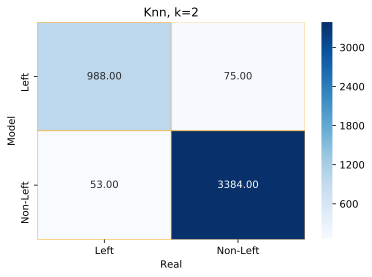

In [80]:
print_confusion_matrix(grid_search_cv.predict(x_holdout),y_holdout,
                       xlabel='Real',
                       ylabel='Model',
                       title='Knn, k=2')

In [81]:
report = classification_report(y_holdout, grid_search_cv.predict(x_holdout), target_names=['Non-Left','Left'])
print(report);
# accuracy_score(y_holdout, grid_search_cv.predict(x_holdout))


             precision    recall  f1-score   support

   Non-Left       0.98      0.98      0.98      3437
       Left       0.95      0.93      0.94      1063

avg / total       0.97      0.97      0.97      4500



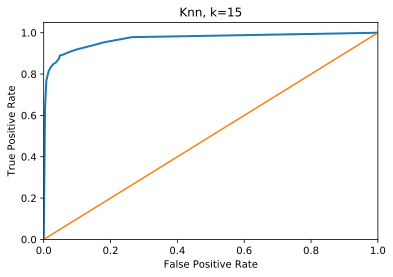

In [72]:
print_roc_curve(
    grid_search_cv.predict_proba(x_holdout)[:,1], 
    y_holdout, 
    'False Positive Rate', 
    'True Positive Rate', 
    'Knn, k=15')

In [35]:
grid_search_cv.best_params_

{'knn__n_neighbors': 1}

In [36]:
grid_search_cv.best_score_

0.9152306343167012

In [52]:
# В scikit-learn есть своя реализация бустинга, однако есть альтернативные варианты в лице известной библиотеки xgboost
# и catboost (яндекс)
# В целом, xgboost предосставляет более гибкую реализацию, нежели реализация scikit-learn (больше гиперпараметров, 
# а также возможность брать за основу линейные модеоли, а не только деревья решений). Кроме того xgboost позволяет 
# распараллеливать работу и в целос значительно быстрее.
# Продемонстрируем последнее. 

import time
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

%matplotlib  inline
import matplotlib.pyplot as plt


In [2]:
runs_number = 50 # количесто запусков (для статистики)
xgb_1thread_time = list()
xgb_3thread_time = list()
xgb_5thread_time = list()
sklearn_time = list()

xgb_1thread_params = {'booster': 'gbtree', 
                      'max_depth': 3, 
                      'eta': 0.1, 
                      'silent': 1, 
                      'objective': 
                      'binary:logistic', 
                      'nthread': 1}

xgb_3thread_params = {'booster': 'gbtree', 
                      'max_depth': 3, 
                      'eta': 0.1, 
                      'silent': 1, 
                      'objective': 
                      'binary:logistic', 
                      'nthread': 3}


xgb_5thread_params = {'booster': 'gbtree', 
                      'max_depth': 3, 
                      'eta': 0.1, 
                      'silent': 1, 
                      'objective': 
                      'binary:logistic', 
                      'nthread': 5}

sklearn_params = {'n_estimators': 100, 'max_depth': 3}

In [3]:
def run_boosting_speed_test():
    for i in range(1, runs_number):
        X, y = make_classification(n_samples=1000, n_features=50, n_informative=20)
        
        t = time.time()
        boosting = xgb.train(xgb_1thread_params, xgb.DMatrix(X, label=y), num_boost_round=100)
        elapsed_time = time.time() - t
        xgb_1thread_time.append(elapsed_time)
    
        t = time.time()
        boosting = xgb.train(xgb_3thread_params, xgb.DMatrix(X, label=y),  num_boost_round=100)
        elapsed_time = time.time() - t
        xgb_3thread_time.append(elapsed_time)
        
        t = time.time()
        boosting = xgb.train(xgb_5thread_params, xgb.DMatrix(X, label=y),  num_boost_round=100)
        elapsed_time = time.time() - t
        xgb_5thread_time.append(elapsed_time)
        
        t = time.time()
        clf = GradientBoostingClassifier(**sklearn_params).fit(X, y)
        elapsed_time = time.time() - t
        sklearn_time.append(elapsed_time)
        
        

In [4]:
def draw_results():
    
    plt.figure(figsize=(12, 8))

    xgb_1thread_mean_time = sum(xgb_1thread_time)/runs_number
    xgb_3thread_mean_time = sum(xgb_5thread_time)/runs_number
    xgb_5thread_mean_time = sum(xgb_5thread_time)/runs_number
    sklearn_mean_time = sum(sklearn_time)/runs_number
    
    plt.plot(xgb_1thread_time, label='XGBooster (Кол-во потоков 1)', lw=2)
    plt.plot(xgb_3thread_time, label='XGBooster (Кол-во потоков 3)', lw=2)
    plt.plot(xgb_5thread_time, label='XGBooster (Кол-во потоков 5)', lw=2)
    plt.plot(sklearn_time, label='GradientBoostingClassifier (всегда один поток)', lw=2)
    
    plt.legend(loc='best')
    
    plt.text(1, 0.23, 
         'XGBoost (Кол-во потоков 1) среднее время равно %.2f' % xgb_1thread_mean_time +
         '\n\nXGBoost (Кол-во потоков 3) среднее время равно %.2f' % xgb_3thread_mean_time +
         '\n\nXGBoost (Кол-во потоков 5) среднее время равно %.2f' % xgb_5thread_mean_time +
         '\n\nScikit-learn mean time = %.2f' % sklearn_mean_time, fontsize=6)
    
    plt.xlabel('Номер итерации')
    plt.ylabel('Время, сек')
    plt.title('Сравнение скорости XGBooster vs. GradientBoostingClassifier ')
    plt.show()
    
    
    

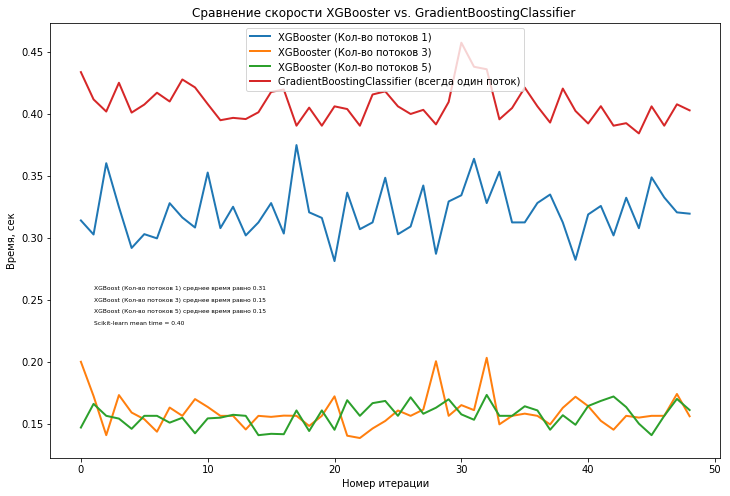

In [5]:
run_boosting_speed_test()
draw_results()

In [ ]:
# class sklearn.ensemble.RandomForestRegressor(
#     n_estimators — число деревьев в "лесу" (по дефолту – 10)
#     criterion — функция, которая измеряет качество разбиения ветки дерева (по дефолту — "mse" , так же можно выбрать "mae")
#     max_features — число признаков, по которым ищется разбиение. Вы можете указать конкретное число или процент признаков, либо выбрать из доступных значений: "auto" (все признаки), "sqrt", "log2". По дефолту стоит "auto".
#     max_depth — максимальная глубина дерева  (по дефолту глубина не ограничена)
#     min_samples_split — минимальное количество объектов, необходимое для разделения внутреннего узла. Можно задать числом или процентом от общего числа объектов (по дефолту — 2)
#     min_samples_leaf — минимальное число объектов в листе. Можно задать числом или процентом от общего числа объектов (по дефолту — 1)
#     min_weight_fraction_leaf — минимальная взвешенная доля от общей суммы весов (всех входных объектов) должна быть в листе (по дефолту имеют одинаковый вес)
#     max_leaf_nodes — максимальное количество листьев (по дефолту нет ограничения)
#     min_impurity_split — порог для остановки наращивания дерева (по дефолту 1е-7)
#     bootstrap — применять ли бустрэп для построения дерева (по дефолту True)
#     oob_score — использовать ли out-of-bag объекты для оценки R^2 (по дефолту False)
#     n_jobs — количество ядер для построения модели и предсказаний (по дефолту 1, если поставить -1, то будут использоваться все ядра)
#     random_state — начальное значение для генерации случайных чисел (по дефолту его нет, если хотите воспроизводимые результаты, то нужно указать любое число типа int
#     verbose — вывод логов по построению деревьев (по дефолту 0)
#     warm_start — использует уже натренированую модель и добавляет деревьев в ансамбль (по дефолту False)
# )

In [ ]:
# class sklearn.ensemble.RandomForestClassifier(
#     criterion — поскольку у нас теперь задача классификации, то по дефолту выбран критерий "gini" (можно выбрать "entropy")
#     class_weight — вес каждого класса (по дефолту все веса равны 1, но можно передать словарь с весами, либо явно указать "balanced", тогда веса классов будут равны их исходным частям в генеральной совокупности; также можно указать "balanced_subsample", тогда веса на каждой подвыборке будут меняться в зависимости от распределения классов на этой подвыборке.
# )

In [ ]:
# Наиболее важные
# n_estimators — число деревьев в "лесу"
# criterion — критерий для разбиения выборки в вершине
# max_features — число признаков, по которым ищется разбиение
# min_samples_leaf — минимальное число объектов в листе
# max_depth — максимальная глубина дерева

In [12]:
RANDOM_FOREST_HYPER_PARAM_MAX_DEPTH = 'max_depth'
RANDOM_FOREST_HYPER_PARAM_MAX_FEATURES = 'max_features'
RANDOM_FOREST_HYPER_PARAM_MIN_SAMPLES_LEAF = 'min_samples_leaf'
RANDOM_FOREST_ESTIMATORS_COUNT = 100

TOP_MAX_FEATURE_VALUE = 7
MAX_FEATURES_VALUES_LIST = [4, 7, 10, 14]
MIN_SAMPLES_LEAF_VALUES_LIST = [1, 5, 7, 12]
MAX_DEPTH_VALUES_LIST = [5,10,15,20]
RANDOM_FOREST_OOB_SCORE = True
CROSS_VALIDATION_COUNT = 5
JOBS_NUMBER = -1
STRATIFIED_K_FOLD_COUNT = 5



In [66]:
def get_trained_random_forest_classifier_search_cv(X_train, y_train):
    stratified_k_fold = StratifiedKFold(n_splits=STRATIFIED_K_FOLD_COUNT, shuffle=True)
    forest_params = {
        RANDOM_FOREST_HYPER_PARAM_MAX_DEPTH : MAX_DEPTH_VALUES_LIST, 
        RANDOM_FOREST_HYPER_PARAM_MAX_FEATURES : range(1, TOP_MAX_FEATURE_VALUE),
        RANDOM_FOREST_HYPER_PARAM_MIN_SAMPLES_LEAF : MIN_SAMPLES_LEAF_VALUES_LIST
    }
    
    random_forest_clf = RandomForestClassifier(
        n_estimators=RANDOM_FOREST_ESTIMATORS_COUNT, 
        n_jobs=JOBS_NUMBER, 
        oob_score=RANDOM_FOREST_OOB_SCORE
    )
    
    random_forest_grid = GridSearchCV(
        estimator=random_forest_clf, 
        param_grid=forest_params, 
        n_jobs=JOBS_NUMBER, 
        cv=stratified_k_fold, 
        scoring=GRID_SEARCH_CV_SCORING,
        verbose=1
    )
    random_forest_grid.fit(X_train, y_train)
    return random_forest_grid
    
  

In [78]:
grid_search_cv = get_trained_random_forest_classifier_search_cv(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  1.5min finished


In [79]:
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'max_depth': 20, 'max_features': 6, 'min_samples_leaf': 1}
0.8149220071072555


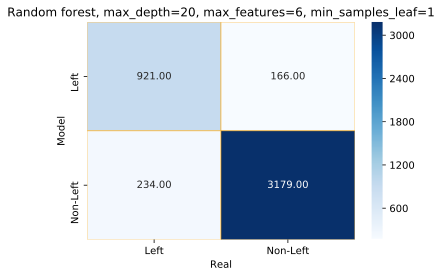

In [80]:
print_confusion_matrix(grid_search_cv.predict(x_holdout),y_holdout,
                       xlabel='Real',
                       ylabel='Model',
                       title='Random forest, max_depth=20, max_features=6, estimator_count=100')

In [81]:
report = classification_report(y_holdout, grid_search_cv.predict(x_holdout), target_names=['Non-Left','Left'])
print(report);
accuracy_score(y_holdout, grid_search_cv.predict(x_holdout))

             precision    recall  f1-score   support

   Non-Left       0.95      0.93      0.94      3413
       Left       0.80      0.85      0.82      1087

avg / total       0.91      0.91      0.91      4500



0.9111111111111111

In [ ]:
XGBOOST_HYPER_PARAM_OBJECTIVE = 'objective'
XGBOOST_OBJECTIVE_BINARY_LOGISTIC = 'binary:logistic'
XGBOOST_NUM_BOOST_ROUND = 50
XGBOOST_HYPER_PARAM_SILENT = 'silent'
XGBOOST_SILENT_VALUE = 1
XGBOOST_HYPER_PARAM_ETA = 'eta'
XGBOOST_ETA_VALUE = 0.5
MAX_DEPTH_VALUE = 3
XGBOOST_NTHREAD = 3

#                      {'booster': 'gbtree', 
#                       'max_depth': 3, 
#                       'eta': 0.1, 
#                       'silent': 1, 
#                       'objective': 
#                       'binary:logistic', 
#                       'nthread': 1}

In [ ]:
def get_trained_xgboost_classifier_model(X_train, y_train):
    params = {
        XGBOOST_HYPER_PARAM_OBJECTIVE : XGBOOST_OBJECTIVE_BINARY_LOGISTIC,
        TREE_HYPER_PARAM_MAX_DEPTH : MAX_DEPTH_VALUE,
        XGBOOST_HYPER_PARAM_SILENT : XGBOOST_SILENT_VALUE,
        XGBOOST_HYPER_PARAM_ETA : XGBOOST_ETA_VALUE
    }
    
    watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
    return xgb.train(params, xgb.DMatrix(X_train, label=y_train), num_boost_round=XGBOOST_NUM_BOOST_ROUND)



In [ ]:
model = get_trained_xgboost_classifier_model(x_train, y_train)

In [19]:
 xgb.plot_importance(model)
# model.get_fscore()

NameError: name 'xgb' is not defined

In [ ]:
df_cat_dummies.head()
df_interact = data_frame.copy()

cat_features = data_frame.columns[data_frame.dtypes == 'object']
for i, col1 in enumerate(cat_features):
    for j, col2 in enumerate(cat_features[i + 1:]):
        df_interact[col1 + '_' + col2] = df_interact[col1] + '_' + df_interact[col2]
df_interact.head()

In [71]:
def train_baseline_random_forest(X_train, y_train):
    stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    forest = RandomForestClassifier(n_estimators=5, random_state=1, n_jobs=-1)
    result = cross_val_score(forest, X_train, y_train, cv=stratified_k_fold)    
    return result

In [72]:
res = train_baseline_random_forest(x_train, y_train)
res.mean()

0.9815219946006035

In [64]:
accuracy_score(y_holdout, predicted)

0.9877777777777778

In [17]:
# stratified_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# train_acc = []
# test_acc = []
# temp_train_acc = []
# temp_test_acc = []
# estimators_counts = [5, 10, 15, 20, 30, 50, 75, 100]

# for n_estimator in estimators_counts:
#     forest = RandomForestClassifier(n_estimators=n_estimator, random_state=1, n_jobs=-1, oob_score=True)
#     temp_train_acc = []
#     temp_test_acc = []
#     for train_index, test_index in stratified_k_fold.split(data_frame_dummies, y):
#         X_train, X_test = data_frame_dummies.iloc[train_index], data_frame_dummies.iloc[test_index]
#         y_train, y_test = y[train_index], y[test_index]
#         forest.fit(X_train, y_train)
#         temp_train_acc.append(rfc.score(X_train, y_train))
#         temp_test_acc.append(rfc.score(X_test, y_test))
#     train_acc.append(temp_train_acc)
#     test_acc.append(temp_test_acc)

# train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)


In [18]:
# fig, ax = plt.subplots(figsize=(8, 4))
# ax.plot(trees_grid, train_acc.mean(axis=1), alpha=0.5, color='blue', label='train')
# ax.plot(trees_grid, test_acc.mean(axis=1), alpha=0.5, color='red', label='cv')
# ax.fill_between(trees_grid, test_acc.mean(axis=1) - test_acc.std(axis=1), test_acc.mean(axis=1) + test_acc.std(axis=1), color='#888888', alpha=0.4)
# ax.fill_between(trees_grid, test_acc.mean(axis=1) - 2*test_acc.std(axis=1), test_acc.mean(axis=1) + 2*test_acc.std(axis=1), color='#888888', alpha=0.2)
# ax.legend(loc='best')
# ax.set_ylim([0.88,1.02])
# ax.set_ylabel("Accuracy")
# ax.set_xlabel("N_estimators")

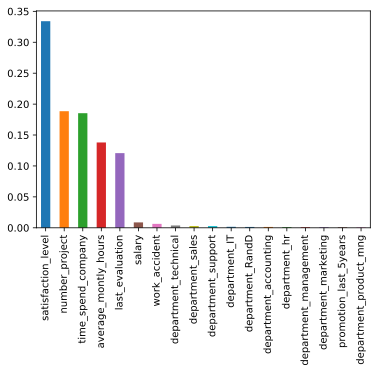

<Figure size 288x360 with 0 Axes>

In [62]:
importances = grid_search_cv.best_estimator_.feature_importances_
formatted = pd.Series(data=importances, index=data_frame_dummies.columns)
formatted.sort_values(ascending=False, inplace=True)
formatted.plot(kind='bar',)
plt.show()

In [87]:
model = xgb.train(xgb_1thread_params, xgb.DMatrix(x_train, label=y_train), num_boost_round=100)

In [88]:
y_predicted = model.predict(xgb.DMatrix(x_holdout))
y_predicted = list(map(lambda x: int(round(x)),y_predicted))
# print(y_predicted)

In [90]:
report = classification_report(y_holdout, y_predicted, target_names=['Non-Left','Left'])
# print(report)
accuracy_score(y_holdout, grid_search_cv.predict(x_holdout))

NameError: name 'grid_search_cv' is not defined

In [20]:
print(y_predicted)

[0.06178233 0.04851158 0.21557228 ... 0.7418613  0.93885076 0.44477162]


In [31]:
from joblib import dump, load

In [11]:
dump(grid_search_cv, 'D:\\filename.joblib')


['D:\\filename.joblib']

In [32]:
loaded_model = load('D:\\trainedmodelshrml_test.joblib')
loaded_model.best_estimator_.feature_importances_

array([5.37806527e-01, 1.05898285e-01, 1.08865078e-01, 1.09637227e-01,
       1.37403797e-01, 3.68016851e-04, 2.10696715e-05])

In [40]:
report = classification_report(y_holdout, grid_search_cv.predict(x_holdout), target_names=['Non-Left','Left'])
grid_search_cv.predict(x_holdout)[21]
x_holdout[21]

array([  0.92, 254.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ])

In [36]:
x_holdout

array([[  1.  , 181.  ,   0.  , ...,   0.  ,   0.  ,   1.  ],
       [  0.79, 222.  ,   0.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.78, 278.  ,   0.  , ...,   1.  ,   0.  ,   0.  ],
       ...,
       [  0.64, 191.  ,   0.  , ...,   0.  ,   1.  ,   0.  ],
       [  0.53, 226.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.61, 134.  ,   0.  , ...,   1.  ,   0.  ,   0.  ]])